<a href="https://colab.research.google.com/github/Vridhi-Wadhawan/Data_Collection_And_Pre_Processing/blob/main/Vridhi_Wadhawan_12420090_DCPP_Individual_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection & Pre Processing**
## **Individual Assignment**
### *By*
### *Vridhi Wadhawan (12420090)*

#### Installing And Importing Libraries
---

In [ ]:
# Installing Packages
!pip install beautifulsoup4                                     # Installs this library to handle web scraping HTML and XML
!pip install wordcloud                                          # Installs this library to generate word cloud visualizations
!pip install nltk matplotlib                                    # Installs this library for Natural Language Toolkit and Matplotlib for text processing and plotting

# Importing Packages
import numpy as np                                              # Imports the numpy library to provide support for numerical operations & arrays
import pandas as pd                                             # Imports the pandas library for handeling data structures and tools for data analysis
import matplotlib.pyplot as plt                                 # Imports the matplotlib library to create plots and charts
import nltk                                                     # Imports the library for natural language processing
import re                                                       # Imports the library to enable regular expression operations for pattern matching
import requests                                                 # Imports the re library to handle HTTP requests
import json                                                     # Imports this library to work with JSON data
import time                                                     # Imports this library to work with time
import datetime                                                 # Imports this library to work with date amd time type of data
from bs4 import BeautifulSoup                                   # Imports this to parse HTML and XML documents for web scraping
from wordcloud import WordCloud                                 # Imports this to generate word cloud visualizations
from nltk.corpus import stopwords                               # Imports this to provide a collection of common stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer     # Imports a tool for analyzing the emotions (positive, negative, neutral) expressed in text.

# Downloading necessary NLTK resources
nltk.download('stopwords')                                      # Downloads a collection of common words for text processing
nltk.download('punkt_tab')                                      # Downloads models used for sentence tokenization
nltk.download('vader_lexicon')                                  # Downloads a lexicon for sentiment analysis

np.set_printoptions(precision=4, suppress=True) # Displays only upto 4 decimals

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


#### Question 2
---

##### Part 1
*Web Scraper To Extract Information from [ISB Advanced Management Programmes](https://www.isb.edu/en/study-isb/advanced-management-programmes.html)*

In [ ]:
# Defining the URL of the ISB Advanced Management Programmes page
url = "https://www.isb.edu/en/study-isb/advanced-management-programmes.html"
# Fetching the webpage
response = requests.get(url)

In [ ]:
# Checking if the connection is successful
# Status code of 200 means the request was successful, and the webpage was retrieved without any errors
response

<Response [200]>

In [ ]:
# Checking the complete HTML code of the webpage to further processe and extract specific information
response.content

b'\n<!DOCTYPE HTML>\n<html lang="en">\n    <head>\n    <meta charset="UTF-8"/>\n    <title>Advanced Management Programme</title>\n    \n    \n    <meta name="template" content="content-page"/>\n    <meta name="viewport" content="width=device-width, initial-scale=1"/>\n    \n\n    \n    \r\n\n    \n\n    \r\n\r\n    \n    \n<link rel="stylesheet" href="/etc.clientlibs/acs-commons/clientlibs/vendor/fontawesome.min.css" type="text/css">\n<link rel="stylesheet" href="/etc.clientlibs/isb/clientlibs/clientlib-base.min.css" type="text/css">\n\n\n\r\n\r\n\r\n\r\n\r\n\r\n    <link rel="canonical" href="https://www.isb.edu/en/study-isb/advanced-management-programmes.html"/>\r\n\r\n\r\n<meta http-equiv="content-type"/>\r\n<meta name="format-detection" content="telephone=no"/>\r\n<meta name="title" content="Advanced Management Programme"/>\r\n\r\n<!-- Google Site Verification Metatag -->\r\n<meta name="google-site-verification" content="kAXw9XfNqZAsLpAnAehCobmU9Zmrbff48W7p3xujlCA"/>\r\n\r\n<!-- Fa

In [ ]:
# Creating a BeautifulSoup object 'soup' to structured representation of the HTML
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE HTML>
<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Advanced Management Programme</title>
<meta content="content-page" name="template"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="/etc.clientlibs/acs-commons/clientlibs/vendor/fontawesome.min.css" rel="stylesheet" type="text/css"/>
<link href="/etc.clientlibs/isb/clientlibs/clientlib-base.min.css" rel="stylesheet" type="text/css"/>
<link href="https://www.isb.edu/en/study-isb/advanced-management-programmes.html" rel="canonical"/>
<meta http-equiv="content-type"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="Advanced Management Programme" name="title"/>
<!-- Google Site Verification Metatag -->
<meta content="kAXw9XfNqZAsLpAnAehCobmU9Zmrbff48W7p3xujlCA" name="google-site-verification"/>
<!-- Facebook Meta Tags -->
<meta content="4el5z47qtk9geskh0bm5oxjlshqu2a" name="facebook-domain-verification"/>
<meta content="Advanced Management Programme" property="og:

In [ ]:
# Narrowing down the HTML content to find the programs
soup.find(class_='cmp-list')

<ul class="cmp-list" data-isb-component-info='{ "componentName": "Master Program" }'>
<h3 class="section headerItem" id="AMPProgrammes"> Advanced Management Programmes  <span>(ISB AMP Suite)</span></h3>
<li class="cmp-list__item">
<div class="row card-4-container">
<div class="col-md-12 col-sm-12">
<div class="card-4">
<figure>
<img alt="imageAltText" class="img-responsive" loading="lazy" src="/content/dam/sites/isb/study-isb/advanced-management-programmes/AMP-AMPBA-Common-Thumbs.png"/>
</figure>
<div class="card-detail">
<span class="award-icon"><img alt="award icon" loading="lazy" src="/content/dam/sites/isb/images/award-ic.png"/></span>
<div class="head-bx">
<div class="tag"></div>
<h3>Advanced Management Programme in Business Analytics &amp; AI (AMPBA)</h3>
<h4>Designed for professionals who want to build or enhance their understanding of data &amp; analytics to inform business decision-making</h4>
</div>
<div class="info-bx">
<div class="row">
<div class="col-md-6 col-xs-6 bor-bot

In [ ]:
# Extracting all programs information on the webpage and stores them in 'info soup'
info_soup = soup.find_all('li', class_ = 'cmp-list__item')
info_soup

[<li class="cmp-list__item">
 <div class="row card-4-container">
 <div class="col-md-12 col-sm-12">
 <div class="card-4">
 <figure>
 <img alt="imageAltText" class="img-responsive" loading="lazy" src="/content/dam/sites/isb/study-isb/advanced-management-programmes/AMP-AMPBA-Common-Thumbs.png"/>
 </figure>
 <div class="card-detail">
 <span class="award-icon"><img alt="award icon" loading="lazy" src="/content/dam/sites/isb/images/award-ic.png"/></span>
 <div class="head-bx">
 <div class="tag"></div>
 <h3>Advanced Management Programme in Business Analytics &amp; AI (AMPBA)</h3>
 <h4>Designed for professionals who want to build or enhance their understanding of data &amp; analytics to inform business decision-making</h4>
 </div>
 <div class="info-bx">
 <div class="row">
 <div class="col-md-6 col-xs-6 bor-botom">
                            Duration: <strong>12 months + 3 months of Capstone Project</strong>
 </div>
 <div class="col-md-6 col-xs-6 bor-botom">
                            Work E

* This will return a list of all instances of "li" elements that have a class attribute with the value "cmp-list_item" within the HTML document parsed by Beautiful Soup.
* Each element in the list 'info_soup' will be a Beautiful Soup object representing an "li" element from the HTML

In [ ]:
# Counting the number of programs found on ISB website to cross check
len(info_soup)

5

* We have 5 Beautful Soup objects within the list object 'info_soup' above which corresponds to the 5 programms that we have on the website. So this seems to work fine!

In [ ]:
# Checking the structure of a single element
info_soup[0]

<li class="cmp-list__item">
<div class="row card-4-container">
<div class="col-md-12 col-sm-12">
<div class="card-4">
<figure>
<img alt="imageAltText" class="img-responsive" loading="lazy" src="/content/dam/sites/isb/study-isb/advanced-management-programmes/AMP-AMPBA-Common-Thumbs.png"/>
</figure>
<div class="card-detail">
<span class="award-icon"><img alt="award icon" loading="lazy" src="/content/dam/sites/isb/images/award-ic.png"/></span>
<div class="head-bx">
<div class="tag"></div>
<h3>Advanced Management Programme in Business Analytics &amp; AI (AMPBA)</h3>
<h4>Designed for professionals who want to build or enhance their understanding of data &amp; analytics to inform business decision-making</h4>
</div>
<div class="info-bx">
<div class="row">
<div class="col-md-6 col-xs-6 bor-botom">
                           Duration: <strong>12 months + 3 months of Capstone Project</strong>
</div>
<div class="col-md-6 col-xs-6 bor-botom">
                           Work Experience: <strong>2+

In [ ]:
# Sample testing to extract the name of the first program and displaying it
test = info_soup[0].find("h3")
test.text

'Advanced Management Programme in Business Analytics & AI (AMPBA)'

In [ ]:
# (i) Extracting and storing the name of all the programs in 'course_name'
course_name = [course.find("h3").text for course in info_soup]
course_name

['Advanced Management Programme in Business Analytics & AI (AMPBA)',
 'Advanced Management Programme for Healthcare (AMPH)',
 'Advanced Management Programme for Infrastructure (AMPI)',
 'Advanced Management Programme in Operations and Supply Chain (AMPOS)',
 'Advanced Management Programme in Public Policy (AMPPP)']

In [ ]:
# (ii) Extracting and storing the brief description of all the programs in 'brief_description'
brief_description = [course.find("h4").text for course in info_soup]
brief_description

['Designed for professionals who want to build or enhance their understanding of data & analytics to inform business decision-making',
 'Meant to deliver specialised management education to executives from the healthcare-delivery industry, and those who want to build domain expertise',
 'Specialised programme for professionals who want to build or enhance expertise in the multidisciplinary sector of infrastructure, with focus on emerging economies',
 "Designed to meet the increasing need for specialised executives working in manufacturing and operations, aligned with India's focus on these sectors",
 'Specialised programme for the needs of mid-career and senior-level professionals from the public and private sectors, aimed at refining their understanding of policy design and implementation']

* The below two codes scraps over a specific section of the website representing a program. It searches for a HTML div tag containing the class "col-md-6 col-xs-6 bor-botom" and then it searches for the text "Duration" or "Work Experience". It extracts the text after the "Duration:" or "Work Experience:" and adds it to a list named 'durations' or "work_experience". This is repeated for each program.

In [ ]:
# (iv) Extracting and storing the duration of all the programs in 'duration'
duration = [div.text.split(":")[1].strip() for course in info_soup for div in (course.find_all("div", class_="col-md-6 col-xs-6 bor-botom") or []) if "Duration:" in div.text]
duration

['12 months + 3 months of Capstone Project',
 '12 months',
 '12 months',
 '12 months',
 '12 months']

In [ ]:
# (v) Extracting and storing the work experience required for all the programs in 'work_experience'
work_experience = [div.text.split(":")[1].strip() for course in info_soup for div in (course.find_all("div", class_="col-md-6 col-xs-6 bor-botom") or []) if "Work Experience:" in div.text]
work_experience

['2+ years', '3+ years', '5+ years', '5+ years', '5+ years']

> Side Note: Also another way of extracting would be creating a for loop and then extracting by finding the div containding the class "col-md-6 col-xs-6 bor-botom"

In [ ]:
ext = []
for course in info_soup:
    divs = course.find_all("div", class_="col-md-6 col-xs-6 bor-botom")
    if divs:
        for div in divs:                  # Iterate through the divs
            ext.append(div.text.strip())  # Extract and append the text
ext

['Duration: 12 months + 3 months of Capstone Project',
 'Work Experience: 2+ years',
 'Duration: 12 months',
 'Work Experience: 3+ years',
 'Duration: 12 months',
 'Work Experience: 5+ years',
 'Duration: 12 months',
 'Work Experience: 5+ years',
 'Duration: 12 months',
 'Work Experience: 5+ years']

In [ ]:
durations = ext[0::2]
durations

['Duration: 12 months + 3 months of Capstone Project',
 'Duration: 12 months',
 'Duration: 12 months',
 'Duration: 12 months',
 'Duration: 12 months']

In [ ]:
work_experiences = ext[1::2]
work_experiences

['Work Experience: 2+ years',
 'Work Experience: 3+ years',
 'Work Experience: 5+ years',
 'Work Experience: 5+ years',
 'Work Experience: 5+ years']

##### Part 2
*Creation Of A Dataframe Of The Extracted Information*

In [ ]:
# Extracting Capstone Project information from 'Duration'
capstone_project = ['Yes' if 'Capstone Project' in dur else 'No' for dur in duration]
capstone_project

['Yes', 'No', 'No', 'No', 'No']

In [ ]:
# Creating a dataframe
data = {
    'Course Name': course_name,
    'Brief Description': brief_description,
    'Duration (In Months)': duration,
    'Capstone Project': capstone_project,
    'Work Experience': work_experience
}
df = pd.DataFrame(data)
df

,Course Name,Brief Description,Duration (In Months),Capstone Project,Work Experience
0,Advanced Management Programme in Business Anal...,Designed for professionals who want to build o...,12 months + 3 months of Capstone Project,Yes,2+ years
1,Advanced Management Programme for Healthcare (...,Meant to deliver specialised management educat...,12 months,No,3+ years
2,Advanced Management Programme for Infrastructu...,Specialised programme for professionals who wa...,12 months,No,5+ years
3,Advanced Management Programme in Operations an...,Designed to meet the increasing need for speci...,12 months,No,5+ years
4,Advanced Management Programme in Public Policy...,Specialised programme for the needs of mid-car...,12 months,No,5+ years


#### Question 3
---

##### Part 1
*Wordcloud Creation Based On The Following Article*

> Article Link: [WSJ: How Tech Helped Levi’s Ride the ‘Baggy Jeans’ Trend By Isabelle Bousquette](https://www.wsj.com/articles/how-tech-helped-levis-ride-the-baggy-jeans-trend-f290721d)

In [ ]:
# Storing the file in a variable 'file_path'
file_path = "/content/drive/MyDrive/Colab Notebooks/How_Tech_Helped_Levi.txt"
file_path

'/content/drive/MyDrive/Colab Notebooks/How_Tech_Helped_Levi.txt'

In [ ]:
# Importing and displaying the contents of the file 'How_Tech_Helped_Levi.txt'
with open(file_path, 'r', encoding='utf-8') as file:
  How_Tech_Helped_Levi = file.read()
How_Tech_Helped_Levi

'How Tech Helped Levi’s Ride the ‘Baggy Jeans’ Trend\nA new data infrastructure helped Levi’s crunch the numbers on how everyone—not just the TikTok set—might want to go looser these days\nBy \nIsabelle Bousquette\n\nWSJ | CIO Journal\n\nJan. 27, 2025 6:00 am ET\n\nLevi Strauss knew baggy jeans were a big deal, but its data infrastructure helped the company understand the depth of the trend and move quickly to meet demand. \nLevi Strauss knew baggy jeans were a big deal, but its data infrastructure helped the company understand the depth of the trend and move quickly to meet demand. Photo: Levi Strauss\nLevi Strauss & Co., making jeans since the 1850s, intuitively knew the baggy fit would catch on with younger shoppers, new to its dungarees. But it took technology to help the company see the roomier fit also would catch on with everyone else. \n\n“There’s also a whole lot of people that used to wear a 501, and they love their 501s,” Levi’s Chief Digital Officer Jason Gowans said of the

In [ ]:
# Tokenizing and displaying the text
tokens = nltk.word_tokenize(How_Tech_Helped_Levi)
tokens

['How',
 'Tech',
 'Helped',
 'Levi',
 '’',
 's',
 'Ride',
 'the',
 '‘',
 'Baggy',
 'Jeans',
 '’',
 'Trend',
 'A',
 'new',
 'data',
 'infrastructure',
 'helped',
 'Levi',
 '’',
 's',
 'crunch',
 'the',
 'numbers',
 'on',
 'how',
 'everyone—not',
 'just',
 'the',
 'TikTok',
 'set—might',
 'want',
 'to',
 'go',
 'looser',
 'these',
 'days',
 'By',
 'Isabelle',
 'Bousquette',
 'WSJ',
 '|',
 'CIO',
 'Journal',
 'Jan.',
 '27',
 ',',
 '2025',
 '6:00',
 'am',
 'ET',
 'Levi',
 'Strauss',
 'knew',
 'baggy',
 'jeans',
 'were',
 'a',
 'big',
 'deal',
 ',',
 'but',
 'its',
 'data',
 'infrastructure',
 'helped',
 'the',
 'company',
 'understand',
 'the',
 'depth',
 'of',
 'the',
 'trend',
 'and',
 'move',
 'quickly',
 'to',
 'meet',
 'demand',
 '.',
 'Levi',
 'Strauss',
 'knew',
 'baggy',
 'jeans',
 'were',
 'a',
 'big',
 'deal',
 ',',
 'but',
 'its',
 'data',
 'infrastructure',
 'helped',
 'the',
 'company',
 'understand',
 'the',
 'depth',
 'of',
 'the',
 'trend',
 'and',
 'move',
 'quickly',
 'to

In [ ]:
# Keeping and displaying only the tokens that are alphabetic and convert all to lower case
tokens = [word.lower() for word in tokens if word.isalpha()]
tokens

['how',
 'tech',
 'helped',
 'levi',
 's',
 'ride',
 'the',
 'baggy',
 'jeans',
 'trend',
 'a',
 'new',
 'data',
 'infrastructure',
 'helped',
 'levi',
 's',
 'crunch',
 'the',
 'numbers',
 'on',
 'how',
 'just',
 'the',
 'tiktok',
 'want',
 'to',
 'go',
 'looser',
 'these',
 'days',
 'by',
 'isabelle',
 'bousquette',
 'wsj',
 'cio',
 'journal',
 'am',
 'et',
 'levi',
 'strauss',
 'knew',
 'baggy',
 'jeans',
 'were',
 'a',
 'big',
 'deal',
 'but',
 'its',
 'data',
 'infrastructure',
 'helped',
 'the',
 'company',
 'understand',
 'the',
 'depth',
 'of',
 'the',
 'trend',
 'and',
 'move',
 'quickly',
 'to',
 'meet',
 'demand',
 'levi',
 'strauss',
 'knew',
 'baggy',
 'jeans',
 'were',
 'a',
 'big',
 'deal',
 'but',
 'its',
 'data',
 'infrastructure',
 'helped',
 'the',
 'company',
 'understand',
 'the',
 'depth',
 'of',
 'the',
 'trend',
 'and',
 'move',
 'quickly',
 'to',
 'meet',
 'demand',
 'photo',
 'levi',
 'strauss',
 'levi',
 'strauss',
 'making',
 'jeans',
 'since',
 'the',
 'int

In [ ]:
# Removing all the stop words and displaying the final set of tokens
tokens = [word for word in tokens if word not in stopwords.words('english')]
tokens

['tech',
 'helped',
 'levi',
 'ride',
 'baggy',
 'jeans',
 'trend',
 'new',
 'data',
 'infrastructure',
 'helped',
 'levi',
 'crunch',
 'numbers',
 'tiktok',
 'want',
 'go',
 'looser',
 'days',
 'isabelle',
 'bousquette',
 'wsj',
 'cio',
 'journal',
 'et',
 'levi',
 'strauss',
 'knew',
 'baggy',
 'jeans',
 'big',
 'deal',
 'data',
 'infrastructure',
 'helped',
 'company',
 'understand',
 'depth',
 'trend',
 'move',
 'quickly',
 'meet',
 'demand',
 'levi',
 'strauss',
 'knew',
 'baggy',
 'jeans',
 'big',
 'deal',
 'data',
 'infrastructure',
 'helped',
 'company',
 'understand',
 'depth',
 'trend',
 'move',
 'quickly',
 'meet',
 'demand',
 'photo',
 'levi',
 'strauss',
 'levi',
 'strauss',
 'making',
 'jeans',
 'since',
 'intuitively',
 'knew',
 'baggy',
 'fit',
 'would',
 'catch',
 'younger',
 'shoppers',
 'new',
 'dungarees',
 'took',
 'technology',
 'help',
 'company',
 'see',
 'roomier',
 'fit',
 'also',
 'would',
 'catch',
 'everyone',
 'else',
 'also',
 'whole',
 'lot',
 'people',


In [ ]:
# Joining tokens back to recreate the text as a single string
cleaned_text = ' '.join(tokens)
cleaned_text

'tech helped levi ride baggy jeans trend new data infrastructure helped levi crunch numbers tiktok want go looser days isabelle bousquette wsj cio journal et levi strauss knew baggy jeans big deal data infrastructure helped company understand depth trend move quickly meet demand levi strauss knew baggy jeans big deal data infrastructure helped company understand depth trend move quickly meet demand photo levi strauss levi strauss making jeans since intuitively knew baggy fit would catch younger shoppers new dungarees took technology help company see roomier fit also would catch everyone else also whole lot people used wear love levi chief digital officer jason gowans said company classic jeans also leaning fits something least little bit surprise levi signed deal google cloud began gathering data points purchases retail partner sales loyalty program google database running daily algorithms designed identify predict purchase trends said gowans first time said levi able continuously pull

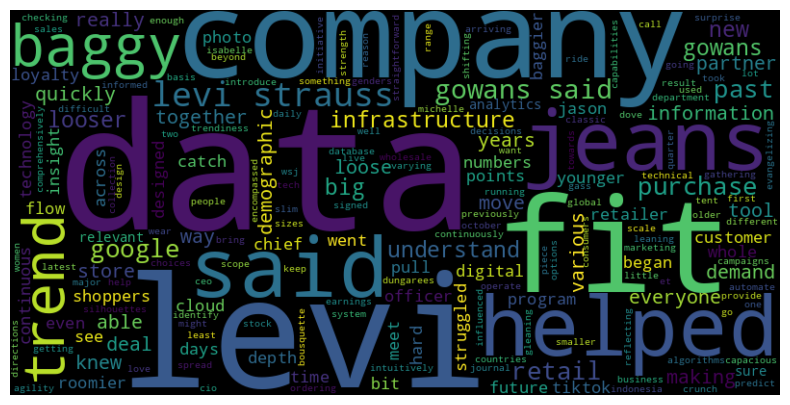

In [ ]:
# Creating a wordcloud
wordcloud = WordCloud(width=800, height=400, background_color ='black', colormap='viridis').generate(cleaned_text)
# Displaying the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Part 2
*Observations Based On The Wordcloud*

Yes, the prominent words in the wordcloud clearly correspond to the article's gist. The key words like that of "data", "analytics","company", "Levi", "trend", "retail" and "baggy" showcases the article’s focus on how technology Levi used the data to identify and monitor the trend of baggy jeans in their favour. The inclusion of words like "infrastructure" and "technology" emphasizes the discussion of the technical aspects behind data collection and analysis, while words like "baggy" and "trend" highlight the fashion and consumer behavior elements. Overall, the wordcloud does help in giving a quick, visual overview of the article as it captures both the dimensions of the article, the analytical and retail.

#### Question 4
---

##### Importing And Storing The File

> Importing the ISB_video_data.parquet file which contains information scraped from the videos on the ISB's youtube channel.

In [ ]:
# Storing the file in a variable 'file_path'
file_path = "/content/drive/MyDrive/Colab Notebooks/ISB_video_data.parquet"
file_path

'/content/drive/MyDrive/Colab Notebooks/ISB_video_data.parquet'

In [ ]:
# Displaying the information on the contents of the file 'ISB_video_data.parquet'
ISB_video_data = pd.read_parquet(file_path)
ISB_video_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       883 non-null    object
dtypes: object(1)
memory usage: 7.0+ KB


In [ ]:
# Displaying the top 6 lines of the file
ISB_video_data.head(6)

,0
0,‘Educating women can solve most problems’: Pun...
1,"Microfinance still considered exploitative, bu..."
2,Accounting Research as Bayesian Inference to t...
3,Does Labor Composition Impact the Transmission...
4,Perilous and Unaccountable: The Positive Relat...
5,"Better with Buy Now, Pay Later? A Competitive ..."


##### Part 1

*Parse the data collected in ISB_video_data.parquet and create columns to view the data*

In [ ]:
# Viewing the first line of the file to understand the data
ISB_video_data.iloc[0,0]

'‘Educating women can solve most problems’: Punjab IAS officer on gender and policy by Indian School of Business 72 views 1 day ago 12 minutes, 41 seconds'

In [ ]:
# (i) Extracting video titles using str.split
ISB_video_data['Title'] = ISB_video_data.iloc[:, 0].str.split(' by ').str[0]
# Checking to see the first element
ISB_video_data['Title'].iloc[0]

'‘Educating women can solve most problems’: Punjab IAS officer on gender and policy'

In [ ]:
# Displaying all the video titles extracted
ISB_video_data['Title']

,Title
0,‘Educating women can solve most problems’: Pun...
1,"Microfinance still considered exploitative, bu..."
2,Accounting Research as Bayesian Inference to t...
3,Does Labor Composition Impact the Transmission...
4,Perilous and Unaccountable: The Positive Relat...
...,...
878,Michael Dell at ISB
879,Thomas Friedman on Globalisation 3.0
880,Professor John Mullins talking about Entrepren...
881,George Bush visit to ISB


In [ ]:
# (ii) Extracting views on the videos from the first column using split and replace
ISB_video_data['Views'] = ISB_video_data.iloc[:, 0].apply(lambda x: x.split(' views')[0].split()[-1].replace(',', '')).astype(int, errors='ignore')
# Checking to see the first element
ISB_video_data['Views'][0]

72

In [ ]:
# Displaying all the views extracted
ISB_video_data['Views']

,Views
0,72
1,292
2,132
3,131
4,79
...,...
878,5851
879,27247
880,2559
881,11828


In [ ]:
# (iii) Extracting months since posting using str.split
# Extracting the date part from the given data and storing it in Date_Original
ISB_video_data['Date_Original'] = ISB_video_data.iloc[:, 0].str.split('views').str[1].str.strip()
# Checking to see the first element
ISB_video_data['Date_Original'][0]

'1 day ago 12 minutes, 41 seconds'

In [ ]:
# Displaying all the extracted original dates
ISB_video_data['Date_Original']

,Date_Original
0,"1 day ago 12 minutes, 41 seconds"
1,8 days ago 21 minutes
2,"12 days ago 5 minutes, 31 seconds"
3,"12 days ago 6 minutes, 6 seconds"
4,"12 days ago 3 minutes, 57 seconds"
...,...
878,"15 years ago 1 minute, 9 seconds"
879,"15 years ago 2 minutes, 24 seconds"
880,"15 years ago 4 minutes, 22 seconds"
881,"15 years ago 2 minutes, 1 second"


In [ ]:
# Converting the date extracted into months using the library 'datetime'
ISB_video_data['Months since posting'] = ISB_video_data['Date_Original'].apply(
    lambda date_string: int(date_string.split()[0]) * 12
    if date_string.split()[1].startswith("year")
    else int(date_string.split()[0])
    if date_string.split()[1].startswith("month")
    else float('nan')
)
# Checking to view the second last element
ISB_video_data['Months since posting'].tail(2).iloc[0]

180.0

In [ ]:
# Displaying all the data of Months since posting
ISB_video_data['Months since posting']

,Months since posting
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
878,180.0
879,180.0
880,180.0
881,180.0


In [ ]:
ISB_video_data

,0,Title,Views,Date_Original,Months since posting
0,‘Educating women can solve most problems’: Pun...,‘Educating women can solve most problems’: Pun...,72,"1 day ago 12 minutes, 41 seconds",NaN
1,"Microfinance still considered exploitative, bu...","Microfinance still considered exploitative, bu...",292,8 days ago 21 minutes,NaN
2,Accounting Research as Bayesian Inference to t...,Accounting Research as Bayesian Inference to t...,132,"12 days ago 5 minutes, 31 seconds",NaN
3,Does Labor Composition Impact the Transmission...,Does Labor Composition Impact the Transmission...,131,"12 days ago 6 minutes, 6 seconds",NaN
4,Perilous and Unaccountable: The Positive Relat...,Perilous and Unaccountable: The Positive Relat...,79,"12 days ago 3 minutes, 57 seconds",NaN
...,...,...,...,...,...
878,Michael Dell at ISB by Indian School of Busine...,Michael Dell at ISB,5851,"15 years ago 1 minute, 9 seconds",180.0
879,Thomas Friedman on Globalisation 3.0 by Indian...,Thomas Friedman on Globalisation 3.0,27247,"15 years ago 2 minutes, 24 seconds",180.0
880,Professor John Mullins talking about Entrepren...,Professor John Mullins talking about Entrepren...,2559,"15 years ago 4 minutes, 22 seconds",180.0
881,George Bush visit to ISB by Indian School of B...,George Bush visit to ISB,11828,"15 years ago 2 minutes, 1 second",180.0


##### Part 2
*Plot Views As A Function Of Months Since Posting And Jotting Down The Observations*

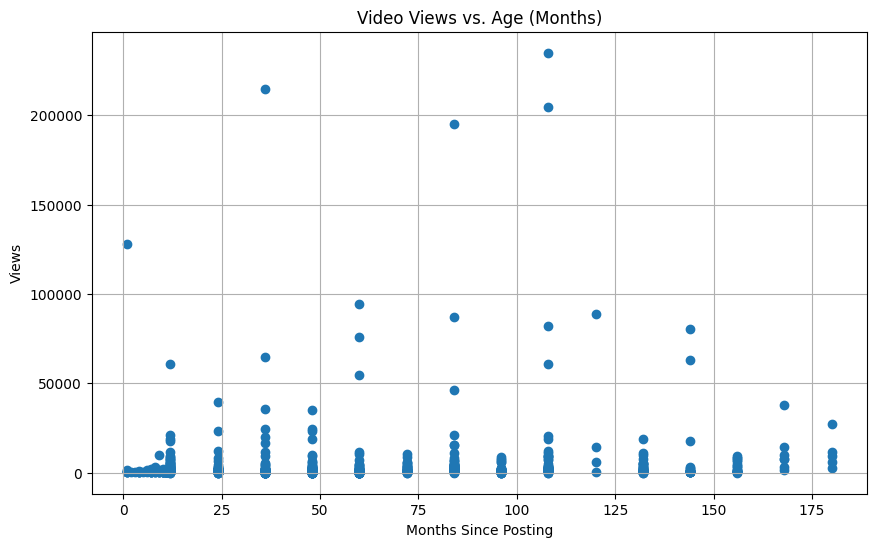

In [ ]:
# Plotting View as a function of Months since posting
plt.figure(figsize=(10, 6))
plt.scatter(ISB_video_data['Months since posting'], ISB_video_data['Views'])
plt.xlabel('Months Since Posting')
plt.ylabel('Views')
plt.title('Video Views vs. Age (Months)')
plt.grid(True)
plt.show()

The graph shows how the number of views a video gets changes over time (measured in months) since it was posted. We see that there isn’t a clear-cut pattern where newer or older videos of ISB consistently outperform the other. Both low and high-view outliers appear across the entire timeline, which indicates that some videos gain traction immediately, while others may accumulate views over a longer period of time. Only a few of videos stand out with very high view counts above 100,000 and some even surpassing 200,000 views. Since this occurs at various points along the timeline, which suggests that only a few videos become more popular than the rest. We see the presence of high-view points beyond the initial posting months which hints that certain content of ISB can continue to attract viewers or go “viral” long after it first appears indicating that some videos continue to perform really well no matter how long they have been online. Thus, overall the scatter plot shows that while most videos accumulate relatively modest views, there are exceptions at various ages where a video achieves substantially higher view counts which indicates that views does not a strong relationship with the age of the video as older videos might have a chance of gaining more views over time, but this is not always the case and that there might be other factors contributing to the videos success.

##### Part 3

*Question: Analyzing To Check If There Is A Relationship Between Video's Title length And The Number Of Views It Gathers*

In [ ]:
# Calculating and storing title lengths in 'Title Lengths'
ISB_video_data['Title Length'] = ISB_video_data['Title'].str.len()
# Checking to see the first element
ISB_video_data['Title Length'] [0]

82

In [ ]:
# Displaying the entire column
ISB_video_data['Title Length']

,Title Length
0,82
1,91
2,65
3,83
4,98
...,...
878,19
879,36
880,53
881,24


In [ ]:
# Seeing the complete data set
ISB_video_data

,0,Title,Views,Date_Original,Months since posting,Title Length
0,‘Educating women can solve most problems’: Pun...,‘Educating women can solve most problems’: Pun...,72,"1 day ago 12 minutes, 41 seconds",NaN,82
1,"Microfinance still considered exploitative, bu...","Microfinance still considered exploitative, bu...",292,8 days ago 21 minutes,NaN,91
2,Accounting Research as Bayesian Inference to t...,Accounting Research as Bayesian Inference to t...,132,"12 days ago 5 minutes, 31 seconds",NaN,65
3,Does Labor Composition Impact the Transmission...,Does Labor Composition Impact the Transmission...,131,"12 days ago 6 minutes, 6 seconds",NaN,83
4,Perilous and Unaccountable: The Positive Relat...,Perilous and Unaccountable: The Positive Relat...,79,"12 days ago 3 minutes, 57 seconds",NaN,98
...,...,...,...,...,...,...
878,Michael Dell at ISB by Indian School of Busine...,Michael Dell at ISB,5851,"15 years ago 1 minute, 9 seconds",180.0,19
879,Thomas Friedman on Globalisation 3.0 by Indian...,Thomas Friedman on Globalisation 3.0,27247,"15 years ago 2 minutes, 24 seconds",180.0,36
880,Professor John Mullins talking about Entrepren...,Professor John Mullins talking about Entrepren...,2559,"15 years ago 4 minutes, 22 seconds",180.0,53
881,George Bush visit to ISB by Indian School of B...,George Bush visit to ISB,11828,"15 years ago 2 minutes, 1 second",180.0,24


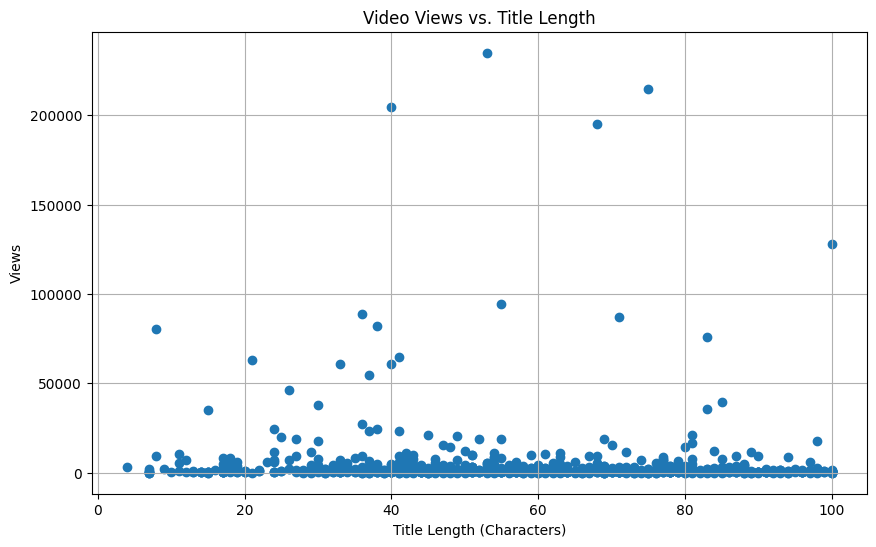

In [ ]:
# Creating a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(ISB_video_data['Title Length'], ISB_video_data['Views'])
plt.xlabel('Title Length (Characters)')
plt.ylabel('Views')
plt.title('Video Views vs. Title Length')
plt.grid(True)
plt.show()

In [ ]:
# Calculating correlation coefficient
correlation = ISB_video_data['Title Length'].corr(ISB_video_data['Views'])
print(f"Correlation between Title Length and Views: {correlation}")

Correlation between Title Length and Views: -0.04590630595610564


The scatter plot and correlation value of -0.0446 together suggest that there is no meaningful relationship between video title length and the number of views a video receives. The data points are widely dispersed across the entire range of title lengths, with no clear pattern suggesting that shorter or longer titles systematically yield more views. The correlation coefficient of -0.0446 further confirms this, as it is very close to zero, indicating an extremely weak negative correlation. While there is a very slight negative slope, it is too weak to be considered significant. Overall, the title length does not have a meaningful impact on the number of views a video gets, suggesting that other factors play a much larger role in determining viewership.

#### Question 5
---

##### Importing And Storing The File

> Importing the quotes_sentiment_data.parquet file which has sentiment scores generated for 1000 random quotes.

In [ ]:
# Storing the file in a variable 'file_path'
file_path = "/content/drive/MyDrive/Colab Notebooks/quotes_sentiment_data.parquet"
file_path

'/content/drive/MyDrive/Colab Notebooks/quotes_sentiment_data.parquet'

In [ ]:
# Displaying the information on the contents of the file 'quotes_sentiment_data.parquet'
quotes_sentiment_data = pd.read_parquet(file_path)
quotes_sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 11021 to 21228
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   quote      1000 non-null   object
 1   scores     1000 non-null   object
 2   sentiment  1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [ ]:
# Displaying the top 6 lines of the file
quotes_sentiment_data.head(6)

,quote,scores,sentiment
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2]
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]"
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]"
2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0]
19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]"
33959,"Imagine a man who doesn't believe in anything,...","{'compound': -0.7696, 'neg': 0.255, 'neu': 0.6...","[1, 1, 1]"


##### Part 1
*Columns Renamed To Reflect The Sentiment Analysis Method Used*

In [ ]:
# Renaming columns to reflect the sentiment analysis method used
quotes_sentiment_data = quotes_sentiment_data.rename(columns={
    'sentiment': 'stanza_sentiment_score', 'scores' : 'VADER_sentiment_score'})
quotes_sentiment_data

,quote,VADER_sentiment_score,stanza_sentiment_score
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2]
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]"
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]"
2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0]
19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]"
...,...,...,...
10374,Someday I must read this scholar Everyone. He ...,"{'compound': -0.4767, 'neg': 0.171, 'neu': 0.8...","[1, 0]"
14398,I count him braver who overcomes his desires t...,"{'compound': 0.0516, 'neg': 0.182, 'neu': 0.62...",[1]
2928,"You can't make people change, but the organize...","{'compound': 0.5927, 'neg': 0.0, 'neu': 0.845,...",[1]
9416,He attacked everything in life with a mix of e...,"{'compound': -0.872, 'neg': 0.365, 'neu': 0.63...",[0]


##### Part 2
*VADER Compound Score Extracted Out Of VADER Score*

In [ ]:
# Extracting the VADER Compound Score out of VADER Score
quotes_sentiment_data['VADER_compound'] = quotes_sentiment_data['VADER_sentiment_score'].apply(lambda x: x['compound'])
quotes_sentiment_data

,quote,VADER_sentiment_score,stanza_sentiment_score,VADER_compound
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2],0.2263
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]",-0.2500
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]",0.9567
2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0],0.7304
19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]",0.0000
...,...,...,...,...
10374,Someday I must read this scholar Everyone. He ...,"{'compound': -0.4767, 'neg': 0.171, 'neu': 0.8...","[1, 0]",-0.4767
14398,I count him braver who overcomes his desires t...,"{'compound': 0.0516, 'neg': 0.182, 'neu': 0.62...",[1],0.0516
2928,"You can't make people change, but the organize...","{'compound': 0.5927, 'neg': 0.0, 'neu': 0.845,...",[1],0.5927
9416,He attacked everything in life with a mix of e...,"{'compound': -0.872, 'neg': 0.365, 'neu': 0.63...",[0],-0.8720


##### Part 3
*Average Stanza Sentiment Score Calculated By Averaging Over All Sentences Sentiment*

In [ ]:
# Calculating the average stanza sentiment score in the column 'average_stanza_sentiment'
quotes_sentiment_data['average_stanza_sentiment'] = quotes_sentiment_data['stanza_sentiment_score'].apply(lambda sentiment_list: np.mean(sentiment_list))
quotes_sentiment_data

,quote,VADER_sentiment_score,stanza_sentiment_score,VADER_compound,average_stanza_sentiment
11021,"…There is the heat of Love, the pulsing rush o...","{'compound': 0.2263, 'neg': 0.156, 'neu': 0.69...",[2],0.2263,2.0
14034,"The good, the bad, and the ugly basically sums...","{'compound': -0.25, 'neg': 0.238, 'neu': 0.559...","[1, 1]",-0.2500,1.0
604,I think there are those individuals who are in...,"{'compound': 0.9567, 'neg': 0.048, 'neu': 0.49...","[1, 2]",0.9567,1.5
2046,"I think it's way harder when you have success,...","{'compound': 0.7304, 'neg': 0.057, 'neu': 0.75...",[0],0.7304,0.0
19155,At least one thing was consistent about her li...,"{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos...","[1, 0]",0.0000,0.5
...,...,...,...,...,...
10374,Someday I must read this scholar Everyone. He ...,"{'compound': -0.4767, 'neg': 0.171, 'neu': 0.8...","[1, 0]",-0.4767,0.5
14398,I count him braver who overcomes his desires t...,"{'compound': 0.0516, 'neg': 0.182, 'neu': 0.62...",[1],0.0516,1.0
2928,"You can't make people change, but the organize...","{'compound': 0.5927, 'neg': 0.0, 'neu': 0.845,...",[1],0.5927,1.0
9416,He attacked everything in life with a mix of e...,"{'compound': -0.872, 'neg': 0.365, 'neu': 0.63...",[0],-0.8720,0.0


##### Part 4
*Consistency Of Scoring Sentiment Examined Across Both The Menthods*

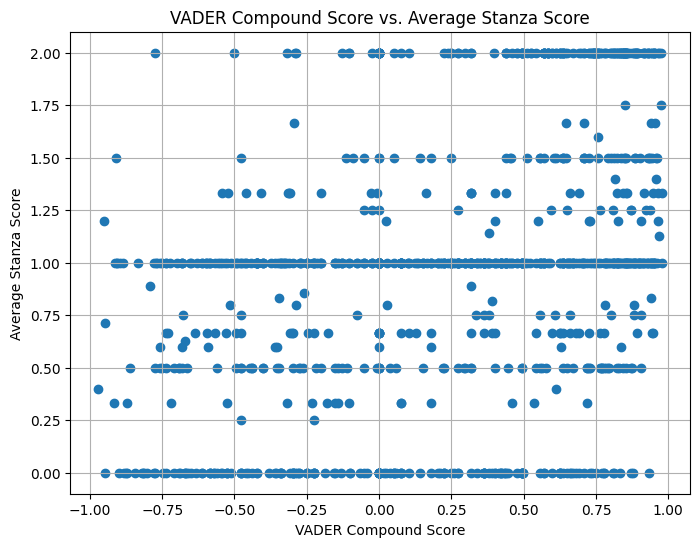

In [ ]:
# Creating the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(quotes_sentiment_data['VADER_compound'], quotes_sentiment_data['average_stanza_sentiment'])
plt.xlabel('VADER Compound Score')
plt.ylabel('Average Stanza Score')
plt.title('VADER Compound Score vs. Average Stanza Score')
plt.grid(True)
plt.show()

If VADER and Stanza were perfectly consistent in sentiment scoring, we would expect a strong positive linear correlation, where an increase in the VADER compound score would correspond to an increase in the average Stanza score  proportionally. But the scatter plot above show a wide dispersion of data points, which indicate a weak linear relationship between VADER and Stanza scores. The horizontal banding pattern implies that unlike VADER, which provides a continuous score from -1 to 1, Stanza categorizes sentiment into 3 discrete levels being those being 0, 1, and 2. If they were perfectly consistant the data points on the scatter plot would form a clear diagonal trend, extending from the bottom-left to the top-right corner, indicating a consistent pattern between the two methods. Additionally, there would be minimal scatter, with points closely clustered around the line, reflecting strong agreement in sentiment assessment across most quotes. But we see that there is lack of a clear diagonal trend further confirms the absence of strong correlation between the two methods.
Thus, VADER and Stanza show inconsistent sentiment scoring, which is likely due to their different methodologies of scoring sentiment. On one hand, VADER provides a continuous sentiment intensity score, while on the other, Stanza categorizes sentiment into discrete levels. The horizontal banding in the scatter plot shows how Stanza’s categorical nature, when directly compared with that of VADER is challenging which further shows the importance of understanding the strengths and limitations of each sentiment analysis method and choose the one that is appropriate for the specific task.

#### Question 6
---

##### Importing And Storing The File

> Importing the online_reviews.csv file

In [ ]:
# Storing and seeing the structure of the dataframe created
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/online_reviews.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2478 entries, 0 to 2477
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductId  2478 non-null   object
 1   Score      2478 non-null   int64 
 2   Text       2478 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.2+ KB


In [ ]:
# Displaying the first five elements of the dataframe
df.head(5)

,ProductId,Score,Text
0,B001E4KFG0,5,I have bought several of the Vitality canned d...
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,4,This is a confection that has been around a fe...
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...


##### Part 1
*Sentiment Analysis Of The Reviews Using The VADER Module*

In [ ]:
# Initializing the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [ ]:
# Creating a Function to Extract sentiment scores
def get_sentiment_scores(text):
    scores = analyzer.polarity_scores(text)
    return {
        'VADER_Negative_Score': scores['neg'],
        'VADER_Neutral_Score': scores['neu'],
        'VADER_Positive_Score': scores['pos'],
        'VADER_Compound_Score': scores['compound']
    }

In [ ]:
# Applying sentiment analysis to 'Text' column
df['VADER_Sentiment_Scores'] = df['Text'].apply(get_sentiment_scores)
df.head(5)

,ProductId,Score,Text,VADER_Sentiment_Scores
0,B001E4KFG0,5,I have bought several of the Vitality canned d...,"{'VADER_Negative_Score': 0.0, 'VADER_Neutral_S..."
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,"{'VADER_Negative_Score': 0.138, 'VADER_Neutral..."
2,B000LQOCH0,4,This is a confection that has been around a fe...,"{'VADER_Negative_Score': 0.091, 'VADER_Neutral..."
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,"{'VADER_Negative_Score': 0.0, 'VADER_Neutral_S..."
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...,"{'VADER_Negative_Score': 0.0, 'VADER_Neutral_S..."


In [ ]:
# Extracting and catogrizing the VADER score
df[['VADER_Negative_Score', 'VADER_Neutral_Score', 'VADER_Positive_Score', 'VADER_Compound_Score']] = df['VADER_Sentiment_Scores'].apply(pd.Series)
df.head(5)

,ProductId,Score,Text,VADER_Sentiment_Scores,VADER_Negative_Score,VADER_Neutral_Score,VADER_Positive_Score,VADER_Compound_Score
0,B001E4KFG0,5,I have bought several of the Vitality canned d...,"{'VADER_Negative_Score': 0.0, 'VADER_Neutral_S...",0.000,0.695,0.305,0.9441
1,B00813GRG4,1,Product arrived labeled as Jumbo Salted Peanut...,"{'VADER_Negative_Score': 0.138, 'VADER_Neutral...",0.138,0.862,0.000,-0.5664
2,B000LQOCH0,4,This is a confection that has been around a fe...,"{'VADER_Negative_Score': 0.091, 'VADER_Neutral...",0.091,0.754,0.155,0.8265
3,B000UA0QIQ,2,If you are looking for the secret ingredient i...,"{'VADER_Negative_Score': 0.0, 'VADER_Neutral_S...",0.000,1.000,0.000,0.0000
4,B006K2ZZ7K,5,Great taffy at a great price. There was a wid...,"{'VADER_Negative_Score': 0.0, 'VADER_Neutral_S...",0.000,0.552,0.448,0.9468


##### Part 2
*Correlation Between Customer Rating and VADER Compound Sentment Score*

In [ ]:
# Calculating the correlation between 'score'ie, rating and 'VADER_Compound_Score'.
correlation = df['Score'].corr(df['VADER_Compound_Score'])
print(f"Correlation between Score ie, rating and VADER Compound Score: {correlation}")

Correlation between Score ie, rating and VADER Compound Score: 0.5222304373700567


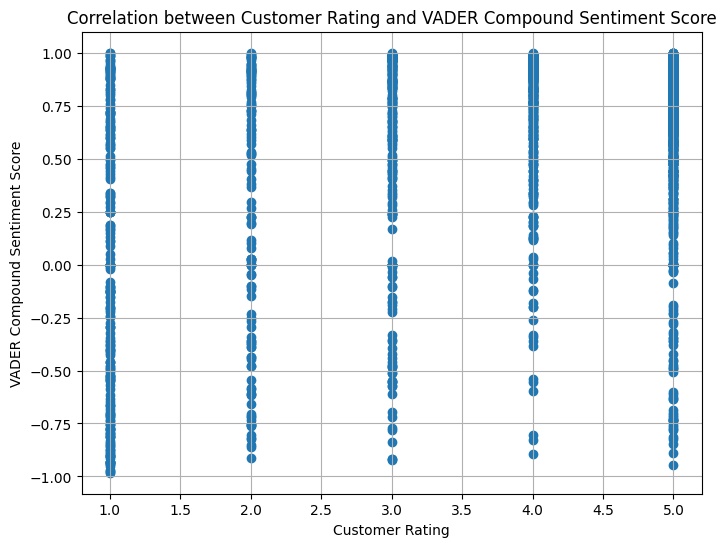

In [ ]:
# Visualizing the relationship using a scatter plot.
plt.figure(figsize=(8, 6))
plt.scatter(df['Score'], df['VADER_Compound_Score'])
plt.xlabel('Customer Rating')
plt.ylabel('VADER Compound Sentiment Score')
plt.title('Correlation between Customer Rating and VADER Compound Sentiment Score')
plt.grid(True)
plt.show()

The scatter plot reveals a moderate positive correlation (0.522) between customer ratings and VADER compound sentiment scores. While a general trend exists where higher ratings tend towards positive sentiment and lower ratings towards negative sentiment,  VADER's analysis doesn't perfectly mirror the nuances of human-assigned ratings.

This is evident in the variability within each rating category.  For instance, even within highly-rated reviews (4 and 5),  VADER identifies instances of neutral or negative sentiment.  Similarly, some low-rated reviews (1 and 2) exhibit neutral or positive sentiment according to VADER. This suggests that  VADER may not fully capture the complexities of human language and the subjective nature of ratings.

In [ ]:
# Grouping by rating and calculate the average compound score
average_compound_by_rating = df.groupby('Score')['VADER_Compound_Score'].mean()
average_compound_by_rating

,VADER_Compound_Score
Score,
1,-0.013644
2,0.263860
3,0.476387
4,0.706125
5,0.779323


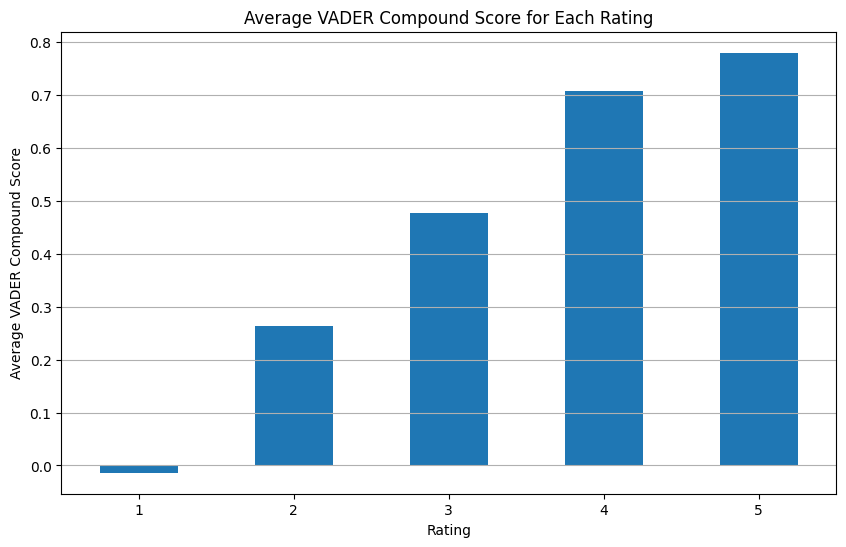

In [ ]:
# Creating the bar plot
plt.figure(figsize=(10, 6))
average_compound_by_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average VADER Compound Score')
plt.title('Average VADER Compound Score for Each Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The bar plot for VADER's average compound score for each rating demonstrates a clear positive relationship, with the average sentiment score increasing as ratings move from 1 to 5. This trend suggests that higher-rated reviews tend to have a more positive in sentiment, as expected, whereas some low-rated reviews still receive neutral or positive sentiment scores, likely due to mixed expressions in the text.

##### Part 3
*Correlation Between Customer Rating and Other VADER Sentment Score*

###### *Correlation Between Customer Rating and Positive VADER Sentment Score*

In [ ]:
# Calculating the correlation between 'score'ie, rating and 'VADER_Positive_Score'.
correlation = df['Score'].corr(df['VADER_Positive_Score'])
print(f"Correlation between Score ie, rating and VADER Positive Score: {correlation}")

Correlation between Score ie, rating and VADER Positive Score: 0.43215126140630994


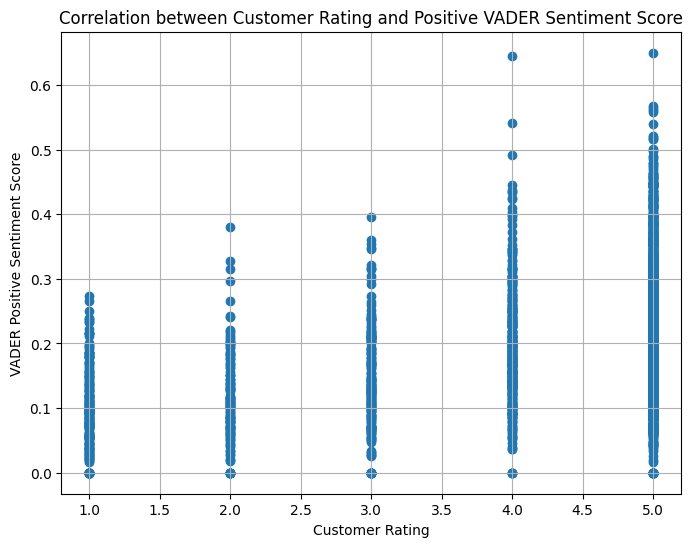

In [ ]:
# Visualizing the relationship using a scatter plot.
plt.figure(figsize=(8, 6))
plt.scatter(df['Score'], df['VADER_Positive_Score'])
plt.xlabel('Customer Rating')
plt.ylabel('VADER Positive Sentiment Score')
plt.title('Correlation between Customer Rating and Positive VADER Sentiment Score')
plt.grid(True)
plt.show()

The scatter plot reveals a moderate positive correlation (0.432) between customer ratings and VADER positive sentiment scores. As expected, higher ratings (4 and 5) generally correspond with higher positive sentiment. However, the plot also shows significant variability within each rating category. Notably, even lower-rated reviews (1 and 2) show some instances of positive sentiment, suggesting that VADER can detect positivity even within negative reviews. The presence of positive sentiment in lower-rated reviews highlights the complexity of capturing nuanced opinions, where even negative experiences can contain elements of praise.

In [ ]:
# Grouping by rating and calculate the average positive score
average_positive_by_rating = df.groupby('Score')['VADER_Positive_Score'].mean()
average_positive_by_rating

,VADER_Positive_Score
Score,
1,0.091218
2,0.114733
3,0.138463
4,0.194200
5,0.225328


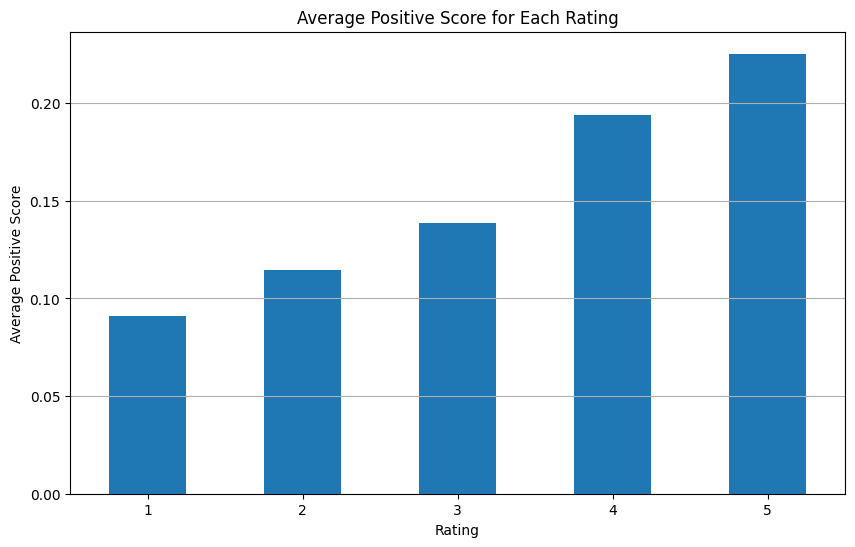

In [ ]:
# Creating the bar plot
plt.figure(figsize=(10, 6))
average_positive_by_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Positive Score')
plt.title('Average Positive Score for Each Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The bar plot demonstrates a strong positive correlation between customer ratings and VADER's average positive sentiment scores. As ratings increase from 1 to 5, the average positive sentiment score consistently rises, indicating that higher-rated reviews generally express more positive sentiment. This trend aligns with expectations and validates VADER's ability to capture broad sentiment patterns. While the chart reveals a clear overall relationship, it's important to remember that individual reviews may deviate, as some lower-rated reviews might contain positive expressions and vice versa. This highlights the inherent complexity of sentiment analysis, even with a clear trend.

###### *Correlation Between Customer Rating and Negative VADER Sentment Score*

In [ ]:
# Calculating the correlation between 'score'ie, rating and 'VADER_Negative_Score'.
correlation = df['Score'].corr(df['VADER_Negative_Score'])
print(f"Correlation between Score ie, rating and VADER Negative Score: {correlation}")

Correlation between Score ie, rating and VADER Negative Score: -0.4080487901455846


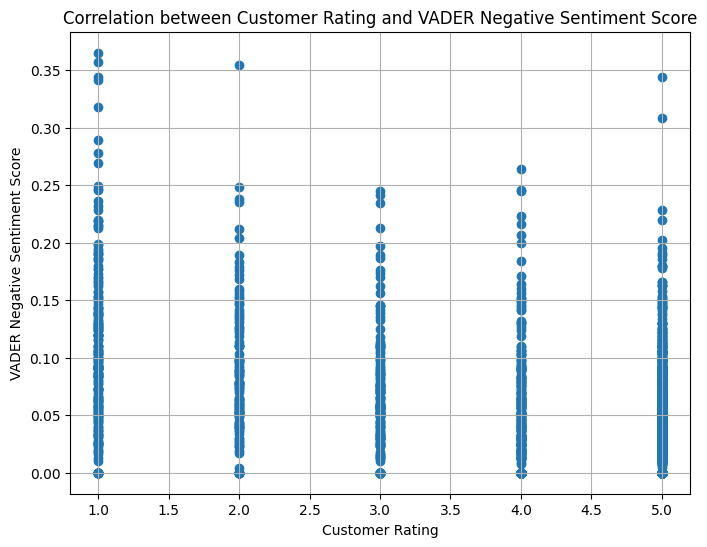

In [ ]:
# Visualizing the relationship using a scatter plot.
plt.figure(figsize=(8, 6))
plt.scatter(df['Score'], df['VADER_Negative_Score'])
plt.xlabel('Customer Rating')
plt.ylabel('VADER Negative Sentiment Score')
plt.title('Correlation between Customer Rating and VADER Negative Sentiment Score')
plt.grid(True)
plt.show()

The scatter plot illustrates a moderate negative correlation (-0.408) between customer ratings and VADER negative sentiment scores. As expected, lower ratings (1 and 2) generally correspond with higher negative sentiment scores. However, notable variability exists within each rating category.  Even higher-rated reviews (4 and 5) exhibit some negative sentiment, indicating that VADER occasionally detects negativity in otherwise positive reviews. The presence of negative sentiment in higher-rated reviews highlights the complexity of capturing nuanced opinions, where even positive experiences can contain elements of criticism.

In [ ]:
# Grouping by rating and calculate the average negative score
average_negative_by_rating = df.groupby('Score')['VADER_Negative_Score'].mean()
average_negative_by_rating

,VADER_Negative_Score
Score,
1,0.098667
2,0.078824
3,0.053438
4,0.042409
5,0.029466


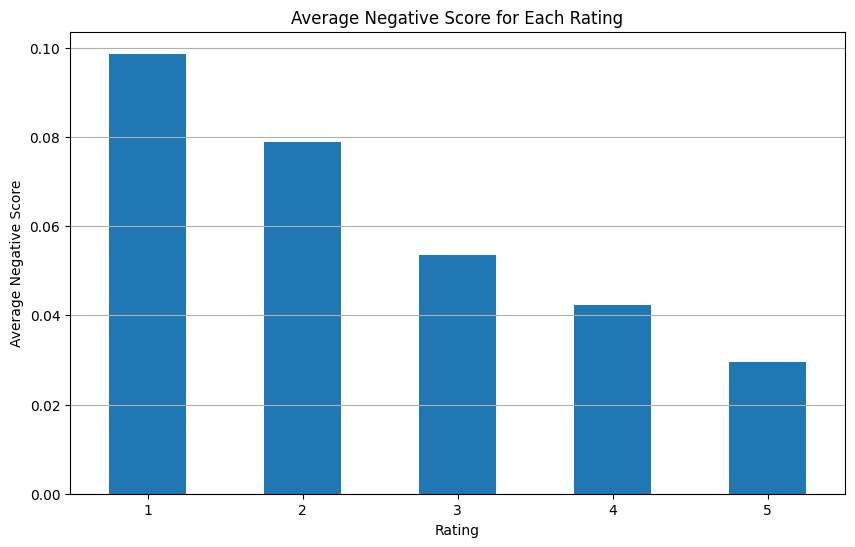

In [ ]:
# Create the bar plot
plt.figure(figsize=(10, 6))
average_negative_by_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Negative Score')
plt.title('Average Negative Score for Each Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The bar plot illustrates a clear inverse relationship between customer ratings and VADER's average negative sentiment scores. As ratings increase from 1 to 5, the average negative sentiment score consistently decreases, indicating that lower-rated reviews generally have more negative sentiment. This trend aligns with expectations and reinforces the effectiveness of VADER in capturing broad sentiment patterns. However, despite the clear overall trend, individual reviews may still show variability as some higher-rated reviews may contain negative expressions highlighting the nuanced nature of customer feedback.

###### *Correlation Between Customer Rating and Neutral VADER Sentment Score*

In [ ]:
# Calculating the correlation between 'score'ie, rating and 'VADER_Neutral_Score'.
correlation = df['Score'].corr(df['VADER_Neutral_Score'])
print(f"Correlation between Score ie, rating and VADER Neutral Score: {correlation}")

Correlation between Score ie, rating and VADER Neutral Score: -0.24261759387562865


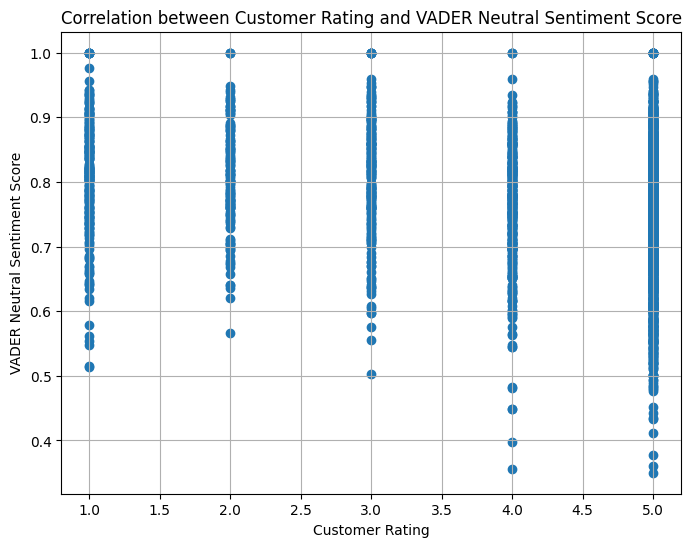

In [ ]:
# Visualize the relationship using a scatter plot.
plt.figure(figsize=(8, 6))
plt.scatter(df['Score'], df['VADER_Neutral_Score'])
plt.xlabel('Customer Rating')
plt.ylabel('VADER Neutral Sentiment Score')
plt.title('Correlation between Customer Rating and VADER Neutral Sentiment Score')
plt.grid(True)
plt.show()

The scatter plot reveals a moderate negative correlation (-0.243) between customer ratings and VADER’s neutral sentiment score. While higher ratings (4 and 5) often show lower neutral scores overall, many reviews in every rating category still register a high degree of neutrality which suggests that a significant portion of review text, whether from a high or low rating, is classified as neither strongly positive nor strongly negative. As a result, the neutral score does not neatly track the customer rating, underscoring that reviews can contain balanced or ambiguous language regardless of how they are rated.

In [ ]:
# Grouping by rating and calculate the average neutral score
average_neutral_by_rating = df.groupby('Score')['VADER_Neutral_Score'].mean()
average_neutral_by_rating

,VADER_Neutral_Score
Score,
1,0.810107
2,0.806321
3,0.808124
4,0.763379
5,0.745205


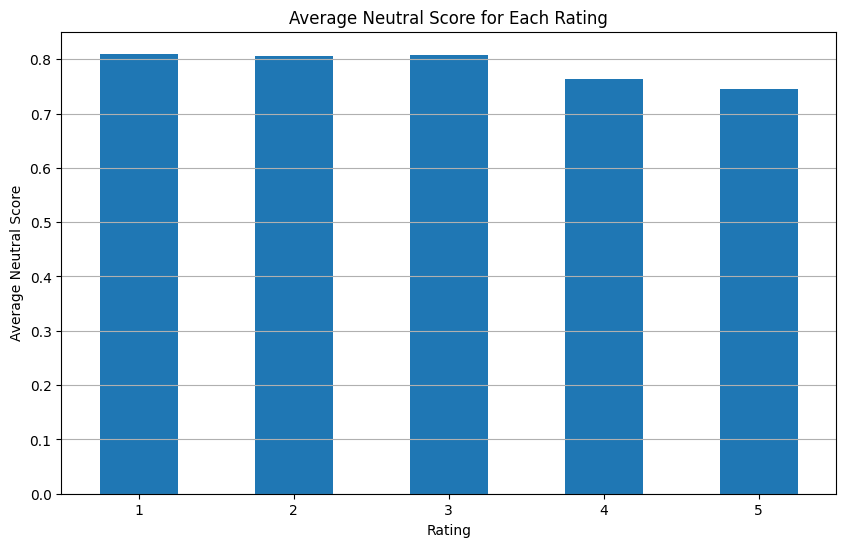

In [ ]:
# Creating the bar plot
plt.figure(figsize=(10, 6))
average_neutral_by_rating.plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Average Neutral Score')
plt.title('Average Neutral Score for Each Rating')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The bar plot for VADER's average neutral score for each rating shows that neutral sentiment scores remain relatively high across all customer ratings. However, there is a slight decreasing trend as ratings increase, indicating that lower-rated reviews tend to have a marginally higher neutral sentiment. This suggests that customers who leave lower ratings might use more neutral or mixed language, while higher ratings are associated with more definitive positive sentiment. Despite this trend, neutral sentiment remains a dominant factor in reviews across all rating levels, highlighting the prevalence of balanced or ambiguous language in customer reviews.

#### Question 7
---

##### Part 1
*Dataframe Creation With The Data From February 5, 2015 Only*

In [ ]:
# Storing and seeing the structure of the dataframe created
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/office_iot.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         20560 non-null  object 
 1   Temperature  20560 non-null  float64
 2   Humidity     20560 non-null  float64
 3   Light        20560 non-null  float64
 4   CO2          20560 non-null  float64
 5   Occupancy    20560 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 963.9+ KB


In [ ]:
# Displaying the first five elements of the dataframe
df.head(5)

,date,Temperature,Humidity,Light,CO2,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,1


In [ ]:
# Converting the 'Date' column to datetime objects and seeing the structure of the dataframe
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20560 non-null  datetime64[ns]
 1   Temperature  20560 non-null  float64       
 2   Humidity     20560 non-null  float64       
 3   Light        20560 non-null  float64       
 4   CO2          20560 non-null  float64       
 5   Occupancy    20560 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 963.9 KB


In [ ]:
# Extracting all the data for February 5, 2015
feb_5_2015_data = df[df['date'].dt.date == pd.to_datetime('2015-02-05').date()]
feb_5_2015_data

,date,Temperature,Humidity,Light,CO2,Occupancy
3034,2015-02-05 00:00:00,21.2450,25.2450,0.0,456.500000,0
3035,2015-02-05 00:01:00,21.2450,25.2450,0.0,458.500000,0
3036,2015-02-05 00:02:00,21.2600,25.2600,0.0,459.666667,0
3037,2015-02-05 00:03:00,21.2450,25.2450,0.0,464.000000,0
3038,2015-02-05 00:04:00,21.2450,25.2000,0.0,465.000000,0
...,...,...,...,...,...,...
4469,2015-02-05 23:55:00,20.2900,21.2900,0.0,439.500000,0
4470,2015-02-05 23:55:00,20.2225,21.2225,0.0,445.000000,0
4471,2015-02-05 23:57:00,20.2000,21.2000,0.0,442.500000,0
4472,2015-02-05 23:57:00,20.2000,21.2000,0.0,443.500000,0


In [ ]:
# Viewing the structure of the final data frame
feb_5_2025_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1440 entries, 3034 to 4473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1440 non-null   datetime64[ns]
 1   Temperature  1440 non-null   float64       
 2   Humidity     1440 non-null   float64       
 3   Light        1440 non-null   float64       
 4   CO2          1440 non-null   float64       
 5   Occupancy    1440 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 78.8 KB


##### Part 2
*Average Temperature For An Occupied Room And An Unoccupied Room On February 5, 2015*

In [ ]:
# Calculating average temperature for occupied rooms
avg_temp_occupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 1]['Temperature'].mean()
avg_temp_occupied

22.095202535528756

In [ ]:
# Calculating the average temperature for occupied rooms
avg_temp_unoccupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 0]['Temperature'].mean()
avg_temp_unoccupied

21.094460784350716

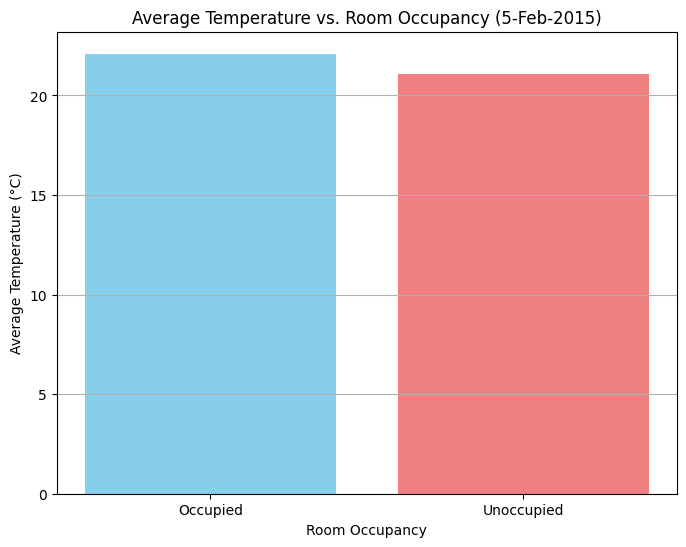

In [ ]:
# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Occupied', 'Unoccupied'], [avg_temp_occupied, avg_temp_unoccupied], color=['skyblue', 'lightcoral'])
plt.xlabel('Room Occupancy')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature vs. Room Occupancy (5-Feb-2015)')
plt.grid(axis='y')
plt.show()

The bar plot shows the relationship between room occupancy and average temperature on Feburary 5, 2015. It shows that rooms marked as "Occupied" tend to have a slightly higher average temperature (22°C) compared to "Unoccupied" rooms (21°C) which suggests that human presence contributes to a slightly warmer environment, possibly due to body heat or heating systems being adjusted when rooms are in use. However, the difference is not very large, indicating that other factors, such as insulation or climate control, might also play a role in maintaining room temperature.

##### Part 3
*Average Humidity For An Occupied Room And An Unoccupied Room On February 5, 2015*

In [ ]:
# Calculating the average humidity for occupied rooms
avg_humid_occupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 1]['Humidity'].mean()
avg_humid_occupied

26.07920902914657

In [ ]:
# Calculating the average humidity for occupied rooms
avg_temp_unoccupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 0]['Humidity'].mean()
avg_temp_unoccupied

23.05870699225305

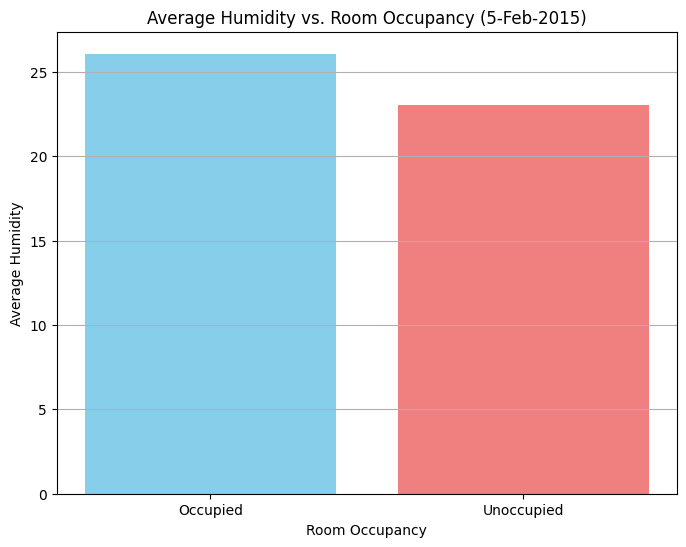

In [ ]:
# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Occupied', 'Unoccupied'], [avg_humid_occupied, avg_temp_unoccupied], color=['skyblue', 'lightcoral'])
plt.xlabel('Room Occupancy')
plt.ylabel('Average Humidity')
plt.title('Average Humidity vs. Room Occupancy (5-Feb-2015)')
plt.grid(axis='y')
plt.show()

The bar plot compares the average humidity levels in occupied and unoccupied rooms on Feburary 5, 2015. The data suggests that occupied rooms have slightly higher humidity (26° humidity) than unoccupied ones (23° humidity) which could be due to presence of people, as people contribute to humidity through breathing and perspiration. However, the difference is minimal, indicating that other factors, such as ventilation or environmental conditions, also influence humidity levels.

##### Part 4
*Average Light For An Occupied Room And An Unoccupied Room On February 5, 2015*

In [ ]:
# Calculating the average light for occupied rooms
avg_light_occupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 1]['Light'].mean()
avg_light_occupied

462.53531230649355

In [ ]:
# Calculating the average light for occupied rooms
avg_light_unoccupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 0]['Light'].mean()
avg_light_unoccupied

36.91640769520533

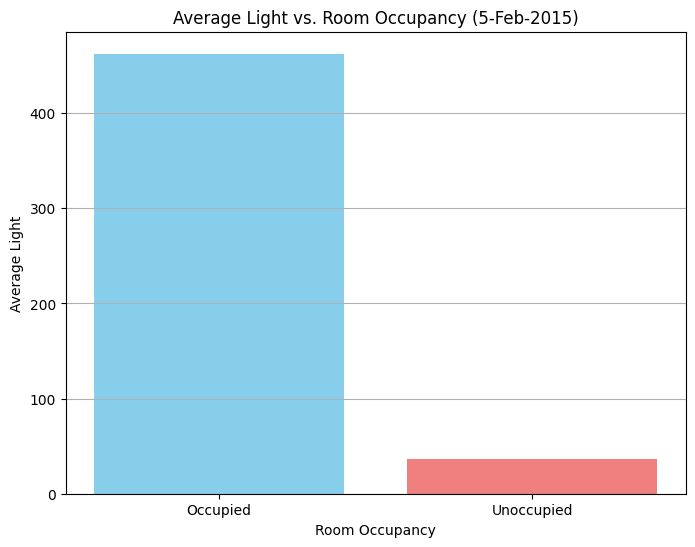

In [ ]:
# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Occupied', 'Unoccupied'], [avg_light_occupied, avg_light_unoccupied], color=['skyblue', 'lightcoral'])
plt.xlabel('Room Occupancy')
plt.ylabel('Average Light')
plt.title('Average Light vs. Room Occupancy (5-Feb-2015)')
plt.grid(axis='y')
plt.show()

The bar plot compares the average light levels in occupied and unoccupied rooms on Feburary 5, 2015. The data shows a significant difference, with occupied rooms having substantially higher light levels of 462.5 than unoccupied ones having 36.9 which suggests that lights are more frequently turned on when rooms are occupied, while unoccupied rooms have minimal lighting, most likely due to energy-saving measures or natural lighting conditions.

##### Part 5
*Average CO2 For An Occupied Room And An Unoccupied Room On February 5, 2015*

In [ ]:
# Calculating the average Co2 for occupied rooms
avg_co2_occupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 1]['CO2'].mean()
avg_co2_occupied

966.0432436538033

In [ ]:
# Calculating average Co2 for occupied rooms
avg_co2_unoccupied = feb_5_2015_data[feb_5_2015_data['Occupancy'] == 0]['CO2'].mean()
avg_co2_unoccupied

518.3746762859047

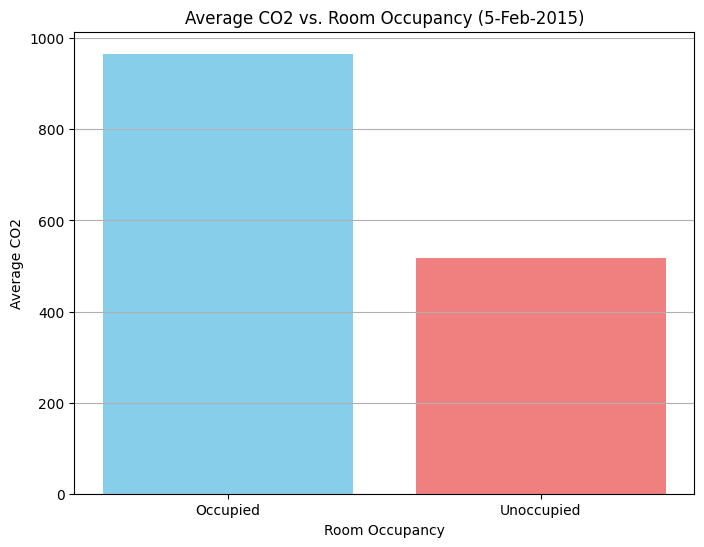

In [ ]:
# Creating the bar plot
plt.figure(figsize=(8, 6))
plt.bar(['Occupied', 'Unoccupied'], [avg_co2_occupied, avg_co2_unoccupied], color=['skyblue', 'lightcoral'])
plt.xlabel('Room Occupancy')
plt.ylabel('Average CO2')
plt.title('Average CO2 vs. Room Occupancy (5-Feb-2015)')
plt.grid(axis='y')
plt.show()

The bar plot compares the average CO2 levels in occupied and unoccupied rooms on Feburary 5, 2015. The data shows that occupied rooms have significantly higher CO2 levels of 966 than unoccupied rooms having 518.37 which is expected, as the presence of people leads to increased concentration of CO2 due to respiration. In contrast, unoccupied rooms have lower CO2 levels, likely due to ventilation or the absence of CO2-producing activities.

### Question 1
---

##### Part 1
*Generation Of A Dataset Of 5000 Random User Profiles Using The Random Data API*

In [ ]:
# Getting the data
user_data = requests.get("https://random-data-api.com/api/v2/users?size=100")
user_data = user_data.json()
print(json.dumps(user_data[0], indent=2))

{
  "id": 3603,
  "uid": "a2aa85a2-05a2-46c6-b3c6-7606c96f22d9",
  "password": "LXV6MgSuUA",
  "first_name": "Johnna",
  "last_name": "Stehr",
  "username": "johnna.stehr",
  "email": "johnna.stehr@email.com",
  "avatar": "https://robohash.org/eiuseosaut.png?size=300x300&set=set1",
  "gender": "Bigender",
  "phone_number": "+1-787 309.442.3107",
  "social_insurance_number": "147675284",
  "date_of_birth": "1968-03-30",
  "employment": {
    "title": "District Hospitality Strategist",
    "key_skill": "Work under pressure"
  },
  "address": {
    "city": "Powlowskiburgh",
    "street_name": "Kuhlman Islands",
    "street_address": "5982 Myrtle Keys",
    "zip_code": "68690",
    "state": "Minnesota",
    "country": "United States",
    "coordinates": {
      "lat": -7.438707534748403,
      "lng": 129.37817419435055
    }
  },
  "credit_card": {
    "cc_number": "5376-5448-1340-3245"
  },
  "subscription": {
    "plan": "Basic",
    "status": "Idle",
    "payment_method": "Google Pay",


In [ ]:
# Initializing a list to store all user profiles
all_users = []
# Total number of batches (50 batches × 100 profiles = 5000 profiles)
num_batches = 50
# Maximum number of retries for each batch if we get a 429 status
max_retries = 5

In [ ]:
# Loop to fetch each batch (50 batches total)
for i in range(num_batches):
    print(f"Fetching batch {i+1} of {num_batches}...")                                                                        # Try up to (max_retries + 1) times for each batch
    for attempt in range(max_retries + 1):
        response = requests.get("https://random-data-api.com/api/v2/users?size=100")
        if response.status_code == 200:                                                                                        # If successful, parse JSON and add it to the main list
            all_users.extend(response.json())
            print(f"Batch {i+1} fetched successfully on attempt {attempt+1}.")
            break                                                                                                              # Exit the retry loop if the batch was successful
        elif response.status_code == 429:
            print(f"Batch {i+1} got 429 (Too Many Requests). Retrying in 3 seconds (Attempt {attempt+1}/{max_retries}).")      # If rate limited, wait for 3 seconds before retrying
            time.sleep(3)
        else:
            print(f"Batch {i+1} failed with status code {response.status_code}.")                                              # Any other error, print the status code and stop retrying for the batch
            break
    else:
        print(f"Batch {i+1} failed after {max_retries+1} attempts. Skipping this batch.")                                      # If the inner loop did not break

Fetching batch 1 of 50...
Batch 1 fetched successfully on attempt 1.
Fetching batch 2 of 50...
Batch 2 got 429 (Too Many Requests). Retrying in 3 seconds (Attempt 1/5).
Batch 2 fetched successfully on attempt 2.
Fetching batch 3 of 50...
Batch 3 got 429 (Too Many Requests). Retrying in 3 seconds (Attempt 1/5).
Batch 3 fetched successfully on attempt 2.
Fetching batch 4 of 50...
Batch 4 got 429 (Too Many Requests). Retrying in 3 seconds (Attempt 1/5).
Batch 4 fetched successfully on attempt 2.
Fetching batch 5 of 50...
Batch 5 got 429 (Too Many Requests). Retrying in 3 seconds (Attempt 1/5).
Batch 5 fetched successfully on attempt 2.
Fetching batch 6 of 50...
Batch 6 got 429 (Too Many Requests). Retrying in 3 seconds (Attempt 1/5).
Batch 6 fetched successfully on attempt 2.
Fetching batch 7 of 50...
Batch 7 got 429 (Too Many Requests). Retrying in 3 seconds (Attempt 1/5).
Batch 7 fetched successfully on attempt 2.
Fetching batch 8 of 50...
Batch 8 fetched successfully on attempt 1.
Fetc

In [ ]:
# Seeing the length of the extracted data
len(all_users)

5100

In [ ]:
#  Createing the DataFrame
all_user_data_df = pd.DataFrame(all_users)
all_user_data_df.head(5)

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription
0,6504,618bde73-257a-4c99-8e27-ad3a9d915654,2mncNWgpvM,Elisha,Harvey,elisha.harvey,elisha.harvey@email.com,https://robohash.org/perspiciatisundevelit.png...,Non-binary,+975 (673) 834-0059 x7090,615723533,1973-12-05,"{'title': 'Education Engineer', 'key_skill': '...","{'city': 'South Leontinetown', 'street_name': ...",{'cc_number': '4446581225530'},"{'plan': 'Gold', 'status': 'Active', 'payment_..."
1,4531,1e41a7b1-b5a6-48c5-8853-97e27a84d6a6,JilGFgjTDk,Eugene,Reynolds,eugene.reynolds,eugene.reynolds@email.com,https://robohash.org/eaquefugapraesentium.png?...,Non-binary,+1-758 1-983-558-4573,439537507,1969-05-27,"{'title': 'Investor Marketing Developer', 'key...","{'city': 'South Millard', 'street_name': 'Doug...",{'cc_number': '5213-1026-8590-3367'},"{'plan': 'Bronze', 'status': 'Idle', 'payment_..."
2,3861,a255ce7a-03b6-4ced-b4d4-1243791df253,fyOzxPd6F9,Tosha,Swift,tosha.swift,tosha.swift@email.com,https://robohash.org/nemononofficiis.png?size=...,Female,+423 282-646-4950 x09324,317694321,1998-04-29,"{'title': 'Future Strategist', 'key_skill': 'C...","{'city': 'North Altonshire', 'street_name': 'S...",{'cc_number': '4499437481732'},"{'plan': 'Bronze', 'status': 'Pending', 'payme..."
3,1205,ebc1f820-7d15-4e77-b50c-46a93143e018,7OzcRXMD2u,Romelia,Heller,romelia.heller,romelia.heller@email.com,https://robohash.org/rerumullamdolores.png?siz...,Agender,+965 1-145-576-1352 x79176,991786252,1996-04-24,"{'title': 'Corporate IT Executive', 'key_skill...","{'city': 'Hymanhaven', 'street_name': 'Gislaso...",{'cc_number': '4680308719033'},"{'plan': 'Starter', 'status': 'Active', 'payme..."
4,5300,81ef4139-4b68-4fca-a07a-9f5526863c5a,BAMO5nx01K,Naoma,Batz,naoma.batz,naoma.batz@email.com,https://robohash.org/voluptassitquidem.png?siz...,Female,+688 (169) 947-5317 x906,726010226,1971-08-11,"{'title': 'Future Associate', 'key_skill': 'Pr...","{'city': 'New Burl', 'street_name': 'Pfannerst...",{'cc_number': '6771-8921-7284-6895'},"{'plan': 'Premium', 'status': 'Idle', 'payment..."


In [ ]:
# Viewing the structure of the dataframe
all_user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       5100 non-null   int64 
 1   uid                      5100 non-null   object
 2   password                 5100 non-null   object
 3   first_name               5100 non-null   object
 4   last_name                5100 non-null   object
 5   username                 5100 non-null   object
 6   email                    5100 non-null   object
 7   avatar                   5100 non-null   object
 8   gender                   5100 non-null   object
 9   phone_number             5100 non-null   object
 10  social_insurance_number  5100 non-null   object
 11  date_of_birth            5100 non-null   object
 12  employment               5100 non-null   object
 13  address                  5100 non-null   object
 14  credit_card              5100 non-null  

##### Part 2
*User Ages Calculation And Addition To The Dataframe*

In [ ]:
# Converting the 'date_of_birth' to datetime objects
all_user_data_df['date_of_birth'] = pd.to_datetime(all_user_data_df['date_of_birth'])
all_user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       5100 non-null   int64         
 1   uid                      5100 non-null   object        
 2   password                 5100 non-null   object        
 3   first_name               5100 non-null   object        
 4   last_name                5100 non-null   object        
 5   username                 5100 non-null   object        
 6   email                    5100 non-null   object        
 7   avatar                   5100 non-null   object        
 8   gender                   5100 non-null   object        
 9   phone_number             5100 non-null   object        
 10  social_insurance_number  5100 non-null   object        
 11  date_of_birth            5100 non-null   datetime64[ns]
 12  employment               5100 non-

In [ ]:
# Calculating the current age
today = datetime.date.today()
def calculate_age(born):
    age = today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    return age
all_user_data_df['age'] = all_user_data_df['date_of_birth'].apply(lambda x: calculate_age(x))
all_user_data_df['age'].head(5)

,age
0,51
1,55
2,26
3,28
4,53


In [ ]:
# Displaying the DataFrame with the new 'age' column
all_user_data_df.head(5)

,id,uid,password,first_name,last_name,username,email,avatar,gender,phone_number,social_insurance_number,date_of_birth,employment,address,credit_card,subscription,age
0,6504,618bde73-257a-4c99-8e27-ad3a9d915654,2mncNWgpvM,Elisha,Harvey,elisha.harvey,elisha.harvey@email.com,https://robohash.org/perspiciatisundevelit.png...,Non-binary,+975 (673) 834-0059 x7090,615723533,1973-12-05,"{'title': 'Education Engineer', 'key_skill': '...","{'city': 'South Leontinetown', 'street_name': ...",{'cc_number': '4446581225530'},"{'plan': 'Gold', 'status': 'Active', 'payment_...",51
1,4531,1e41a7b1-b5a6-48c5-8853-97e27a84d6a6,JilGFgjTDk,Eugene,Reynolds,eugene.reynolds,eugene.reynolds@email.com,https://robohash.org/eaquefugapraesentium.png?...,Non-binary,+1-758 1-983-558-4573,439537507,1969-05-27,"{'title': 'Investor Marketing Developer', 'key...","{'city': 'South Millard', 'street_name': 'Doug...",{'cc_number': '5213-1026-8590-3367'},"{'plan': 'Bronze', 'status': 'Idle', 'payment_...",55
2,3861,a255ce7a-03b6-4ced-b4d4-1243791df253,fyOzxPd6F9,Tosha,Swift,tosha.swift,tosha.swift@email.com,https://robohash.org/nemononofficiis.png?size=...,Female,+423 282-646-4950 x09324,317694321,1998-04-29,"{'title': 'Future Strategist', 'key_skill': 'C...","{'city': 'North Altonshire', 'street_name': 'S...",{'cc_number': '4499437481732'},"{'plan': 'Bronze', 'status': 'Pending', 'payme...",26
3,1205,ebc1f820-7d15-4e77-b50c-46a93143e018,7OzcRXMD2u,Romelia,Heller,romelia.heller,romelia.heller@email.com,https://robohash.org/rerumullamdolores.png?siz...,Agender,+965 1-145-576-1352 x79176,991786252,1996-04-24,"{'title': 'Corporate IT Executive', 'key_skill...","{'city': 'Hymanhaven', 'street_name': 'Gislaso...",{'cc_number': '4680308719033'},"{'plan': 'Starter', 'status': 'Active', 'payme...",28
4,5300,81ef4139-4b68-4fca-a07a-9f5526863c5a,BAMO5nx01K,Naoma,Batz,naoma.batz,naoma.batz@email.com,https://robohash.org/voluptassitquidem.png?siz...,Female,+688 (169) 947-5317 x906,726010226,1971-08-11,"{'title': 'Future Associate', 'key_skill': 'Pr...","{'city': 'New Burl', 'street_name': 'Pfannerst...",{'cc_number': '6771-8921-7284-6895'},"{'plan': 'Premium', 'status': 'Idle', 'payment...",53


##### Part 3
*Generation Of 5000 Datapoints Based On Users Age*

###### Part A
*Random Sample Mean Generation Of 10 Ages From The Age Column*

In [ ]:
# Calculating sample mean in a list
sample_mean_age = all_user_data_df['age'].sample(10).mean()
result_list = [sample_mean_age]
result_list

[37.3]

###### Part B
*Random Sample Mean Generation 5000 Times From The Age Column*

In [ ]:
# Calculating mean and storing in a list
result_list.extend([all_user_data_df['age'].sample(10).mean() for _ in range(5000)])
print(result_list[:5])

[37.3, 39.5, 35.7, 39.2, 36.1]


##### Part 4
*Histogram Creation*

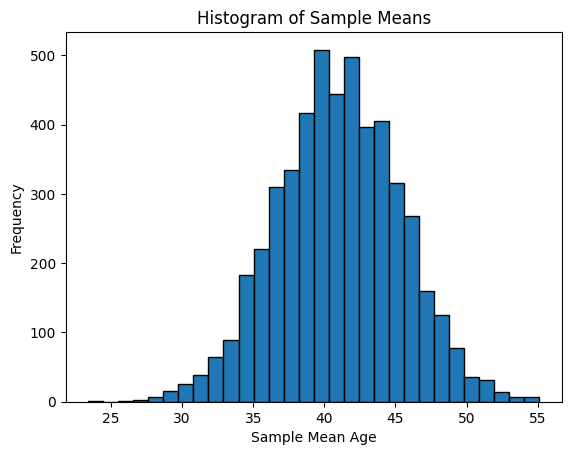

In [ ]:
# Plotting the hstogram of the sample means
plt.hist(result_list, bins=30, edgecolor='black')
plt.xlabel('Sample Mean Age')
plt.ylabel('Frequency')
plt.title('Histogram of Sample Means')
plt.show()

The histogram shows that the distribution of sample means follows an approximately normal, bell-shaped curve whch is consistent with the Central Limit Theorem. The data is fairly symmetric around the central value, with no significant skewness. The peak is around 40, indicating that the population mean is likely close to this value. The sample means mostly range between 35 and 45, with few values extending from 25 to 55, suggesting moderate variability.

##### Part 5
*Payment Method Distribution*

In [ ]:
# Displaying the subscription type from the data
subscription_type = all_user_data_df['subscription'][5]
subscription_type

{'plan': 'Basic',
 'status': 'Active',
 'payment_method': 'Google Pay',
 'term': 'Payment in advance'}

In [ ]:
# Extracting the payment method
all_user_data_df['payment_method'] = all_user_data_df['subscription'].apply(lambda subscription_info: subscription_info.get('payment_method'))
all_user_data_df['payment_method']

,payment_method
0,Google Pay
1,Money transfer
2,WeChat Pay
3,Cheque
4,Debit card
...,...
5095,Cash
5096,Apple Pay
5097,Google Pay
5098,Alipay


In [ ]:
# Getting the count for the payment methods
payment_method_counts = all_user_data_df['payment_method'].value_counts()
payment_method_counts

,count
payment_method,
Cheque,458
Cash,444
Alipay,444
WeChat Pay,440
Paypal,436
Google Pay,434
Bitcoins,430
Apple Pay,428
Money transfer,413


The data shows the number of transactions made using different payment methods. Apple Pay has the most frequently used payment method with 461 transactions, followed closely by PayPal with 440 and Credit Card with 430 transactions. Traditional payment methods like Cheque and Money Transfer had 411 and 398 transactions respectively implying lower usage. Bitcoin and and Google Pay with 381 and 380 transactions have the least number of transactions, indicating that cryptocurrency and certain digital wallets might not be as popular as other options. Overall, digital payment methods dominate, with mobile-based services such as that of Apple Pay, PayPal being the most preferred mode of payment.

##### Part 6
*Unique Employment Titles Given In The Data*

In [ ]:
# Displaying employment titles
employment_title = all_user_data_df['employment'][5]
employment_title

{'title': 'Real-Estate Engineer', 'key_skill': 'Self-motivated'}

In [ ]:
# Extracting the titles
all_user_data_df['title'] = all_user_data_df['employment'].apply(
    lambda employment_info: employment_info.get('title'))
all_user_data_df['title']

,title
0,Education Engineer
1,Investor Marketing Developer
2,Future Strategist
3,Corporate IT Executive
4,Future Associate
...,...
5095,Community-Services Designer
5096,National Retail Facilitator
5097,Investor Technology Associate
5098,Regional Consultant


In [ ]:
# Getting the unique titles
unique_titles = all_user_data_df['title'].unique()
print(unique_titles)

['Education Engineer' 'Investor Marketing Developer' 'Future Strategist'
 ... 'Legacy Banking Consultant' 'Investor Technology Associate'
 'Direct Banking Officer']


In [ ]:
len(unique_titles)

2874

In [ ]:
print(f"Thus, there are {len(unique_titles)} unique employment titles present in the dataset.")

Thus, there are 2799 unique employment titles present in the dataset.


#### Saving Dataframe as CSV
> Saving data frame as CSV for further evaluation in case needed

In [ ]:
# Assuming 'all_user_data_df' is the DataFrame you want to save.
all_user_data_df.to_csv('user_data.csv', index=False)